In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = "."

In [19]:
headers = ['location', 'name', 'province']
dt = {'location': 'float', 'name':'str', 'province':'str'}

tabla = pd.read_json(BASE_DIR + "/pasos.json",dtype=dt)
tabla.head(16)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


In [20]:
tabla.dtypes

location    object
name        object
province    object
dtype: object

### Número crudo de pasos fronterizos:

In [21]:
print(tabla.shape[0])

252


Vemos los valores que toma el campo *province*:

In [22]:
tabla['province'].unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

Vemos que hay un valor que está mal cargado, *AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ* debe ser *Santa Cruz*. Se debe uniformizar *Neuquen* con *NEUQUEN*, y *Córdoba* con *Cordoba*.

In [23]:
tabla.replace('Córdoba','Cordoba',inplace=True)
tabla.replace('AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ','Santa Cruz',inplace=True)
tabla.replace('NEUQUEN','Neuquen',inplace=True)

In [24]:
provincias = tabla['province'].unique()
print(provincias)

['Tierra del Fuego' 'Santa Cruz' 'Chubut' 'Rio Negro' 'Neuquen'
 'Buenos Aires' 'Mendoza' 'San Luis' 'San Juan' 'Santa Fe' 'Cordoba'
 'Entre Rios' 'La Rioja' 'Corrientes' 'Catamarca' 'Santiago del Estero'
 'Tucuman' 'Chaco' 'Misiones' 'Formosa' 'Salta' 'Jujuy']


De una inspección visual vemos que hay pasos fronterizos con igual locación y/o repetidos, por lo cual limpiamos las repeticiones.

In [25]:
Serie = tabla['location']

a = Serie.as_matrix()

lon = []
lat = []

for l in a:
    lat.append(l[0])
    lon.append(l[1])
    
lon = pd.Series(np.array(lon),name='longitud')
lat = pd.Series(np.array(lat),name='latitud')

lon = pd.DataFrame(lon,index=np.arange(252))
lat = pd.DataFrame(lat,index=np.arange(252))

tabla = tabla.join(lon)
tabla = tabla.join(lat)

/home/marioagustin/MiniConda/envs/diplodatos/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
tabla.drop_duplicates(subset=('longitud','latitud'),inplace=True)

In [27]:
provincia = provincias[5]
locations = tabla[tabla['province'] == provincia][['latitud', 'longitud']]
names = tabla[tabla['province'] == provincia][['name']].values.tolist()
locationlist = locations.values.tolist()
print(provincia,len(locationlist))

Buenos Aires 42


In [28]:
#Estas son las modificaciones: Nombre y Provincia

lista = [['HUEMULES','Chubut'],
['PASO COIHAIQUE','Chubut'],
['PTO LIB. GRAL. SAN MARTIN (PF)','Santa Fe'],
['LAMADRID - M.S.LEONARDO','Formosa'],
['PASO BERNARDO DE IRIGOYEN','Misiones'],
['ROU COLONIA','Uruguay'],
['BUQUEBUS COLONIA','Uruguay'],
['ROU - MONTEVIDEO','Uruguay'],
['MONTEVIDEO ROU','Uruguay'],
['BUQUEBUS MONTEVIDEO','Uruguay'],
['AERO CARRASCO','Uruguay'],
['PUERTO IBICUY','Entre Rios'],
['TERMINAL PORTUARIA DEL GUAZU','Entre Rios'],
['PASO EL AZUFRE','San Juan'],
['AERO PASO DE LOS LIBRES','Corrientes'],
['PASO EL CONDADO LAS MAMORAS','Salta'],
['PUERTO COLON','Entre Rios'],
['PUERTO PARANACITO','Entre Rios'],
['PASO VALLE HERMOSO','San Juan'],
['AERO SANTA ROSA','La Pampa'],
['PUERTO ALVEAR','Corrientes'],
['PUERTO BARRANQUERAS','Chaco'],
['JAMA NORTE','Jujuy'],
['GRL BELGRANO - GRL BRUGUEZ','Formosa'],
['PTE. SAN IGNACIO DE LOYOLA','Formosa'],
['PUERTO LAS PALMAS','Chaco'],
['PUERTO CHALANAS','Salta'],
['AERO TARTAGAL','Salta'],
['SALVADOR MAZZA - YACUIBA','Salta']]

for ll in lista:
    tabla.loc[tabla['name'] == ll[0],'province'] = ll[1]


Tierra del Fuego

    SAN SEBASTIAN  ( USHUAIA ) -> repetido
    TERMINAL RIO GRANDE -> repetido
   
Santa Cruz

    HUEMULES -> Chubut
    PASO COIHAIQUE -> Chubut
   
Chubut

    'PTO LIB. GRAL. SAN MARTIN (PF)' -> Santa Fe (según coordenadas), pero parece que está en Misiones
    
Buenos Aires

    'LAMADRID - M.S.LEONARDO' -> Formosa
    'PASO BERNARDO DE IRIGOYEN' -> Misiones
    'ROU COLONIA' -> Uruguay?
    'BUQUEBUS COLONIA' -> Colonia (Uruguay)
    'ROU - MONTEVIDEO' -> Uruguay?
    'MONTEVIDEO ROU' -> Uruguay?
    'BUQUEBUS MONTEVIDEO' -> Uruguay?
    'AERO CARRASCO' -> Uruguay?
    'PUERTO IBICUY' -> Entre Rios
    'TERMINAL PORTUARIA DEL GUAZU' -> Entre Rios
    
Mendoza

    'PASO EL AZUFRE' -> San Juan
    'AERO PASO DE LOS LIBRES' -> Corrientes
    
San Juan

    'PASO EL CONDADO LAS MAMORAS' -> Salta
    
Santa Fe

    'PUERTO COLON' -> Entre Rios
    'PUERTO PARANACITO' -> Entre Rios
    
Cordoba

    'PASO VALLE HERMOSO' -> San Juan
    'AERO SANTA ROSA' -> La Pampa
    
Entre Rios

    'PUERTO ALVEAR' -> Corrientes
    
Corrientes

    'PUERTO BARRANQUERAS' -> Chaco

Catamarca

    'JAMA NORTE' -> Jujuy
    
Chaco

    'GRL BELGRANO - GRL BRUGUEZ' -> Formosa
    
Misiones

    'PTE. SAN IGNACIO DE LOYOLA' -> Formosa
    
Formosa

    'PUERTO LAS PALMAS' -> Chaco
    
Jujuy

    'PUERTO CHALANAS' -> Salta
    'AERO TARTAGAL' -> Salta
    'SALVADOR MAZZA - YACUIBA' -> Salta
    
    

In [31]:
#Tiramos los pasos fronterizos de Uruguay

indices = tabla.index[tabla["province"] == "Uruguay"]
tabla = tabla.drop(indices)

In [32]:
tabla.head()

,location,name,province,longitud,latitud
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego,-68.371289,-54.832543
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego,-68.325863,-54.824938
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego,-68.311475,-54.809673
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego,-68.302951,-54.801912
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz,-72.299357,-51.689636


### Número limpio de pasos fronterizos:

In [33]:
print(tabla.shape[0])

212


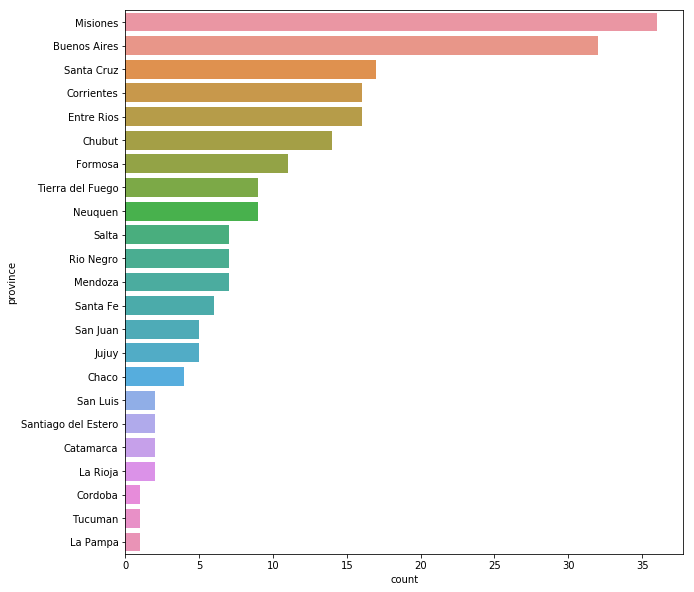

In [38]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y='province',data=tabla,order=tabla["province"].value_counts().index,)
ax.set_ylabel("Provincia")